In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-13 06:13:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-10-13 06:13:02 (97.7 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [13]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [14]:
for i in strings:
    df[i] = df[i].str.replace(' ', '_').str.lower()

In [21]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [23]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [22]:
df.horsepower.median()

np.float64(149.0)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

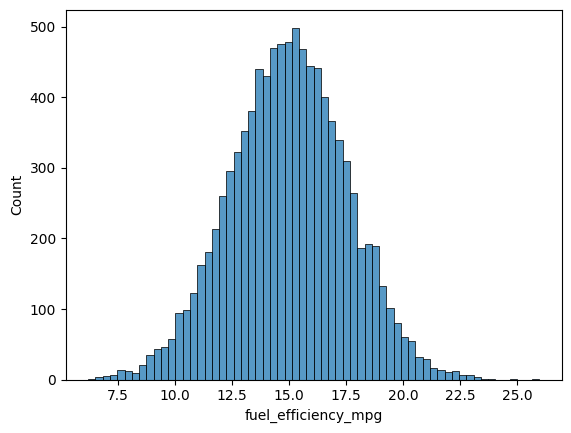

In [16]:
sns.histplot(df['fuel_efficiency_mpg'])

In [49]:
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

df_full = df[base].fillna(df[base].mean(numeric_only=True))
df_full_zero = df[base].fillna(0)
df_full.head()
df_full_zero.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,0.0,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [50]:
n = int(len(df_full))
n_val = int(len(df_full) * 0.2)
n_test = int(len(df_full) * 0.2)
n_train = n - n_val - n_test

n_zero = int(len(df_full_zero))
n_val_zero = int(len(df_full_zero) * 0.2)
n_test_zero = int(len(df_full_zero) * 0.2)
n_train_zero = n_zero - n_val_zero - n_test_zero

In [28]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [ ]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_test]
df_test = df.iloc[n_train+n_test:]

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df_full.iloc[idx[:n_train]]
df_val = df_full.iloc[idx[n_train:n_train+n_test]]
df_test = df_full.iloc[idx[n_train+n_test:]]


df_train_zero = df.iloc[:n_train]
df_val_zero = df.iloc[n_train:n_train+n_test]
df_test_zero = df.iloc[n_train+n_test:]

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train_zero = df_full.iloc[idx[:n_train]]
df_val_zero = df_full.iloc[idx[n_train:n_train+n_test]]
df_test_zero = df_full.iloc[idx[n_train+n_test:]]

In [32]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [35]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [44]:
def train_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [45]:
def train_regression_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [46]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [48]:
w0, w = train_regression(df_train, y_train)
y_pred = w0 + df_train.dot(w)
rmse(y_train, y_pred)

np.float64(0.03581051893414433)

In [42]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    w0, w = train_regression_reg(df_train, y_train, r=r)
    y_pred = w0 + df_train.dot(w)
    score = rmse(y_train, y_pred)

    print(r, w0, score)

0.0 3.6710054038068765 0.03581051893414433
1e-05 3.670431057536804 0.03581051898468362
0.0001 3.665270017694846 0.03581052397386694
0.001 3.6144468198331605 0.03581100902366789
0.01 3.1742943053817156 0.03584829876714686
0.1 1.431307443090871 0.03657097358356658
1 0.22050910752376926 0.037590370372407554
10 0.023311928913587368 0.03779411598593785
